In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip


db = nb.Database("../databases/rc_car/test1")

FPS = 30
SEC_DIST = 2.5
MEDFILT_SIZE_SECS = 0.5
FR_STEP = 1
RIDF_STEP = 2
PREPROC = (ip.resize(180, 55), ip.remove_sky)
FRAME_STEP_SEC = 0.25

FRAME_DIST = round(SEC_DIST * FPS)
MEDFILT_SIZE = round(MEDFILT_SIZE_SECS * FPS)
FRAMES = range(FRAME_DIST, len(db) - FRAME_DIST, round(FRAME_STEP_SEC * FPS))

ca_sizes = []
for fr in FRAMES:
    (images, snap, entries) = db.load_test_frames(fr, FRAME_DIST, PREPROC, FR_STEP)
    idf = nb.route_ridf(images, snap, step=RIDF_STEP)
    ca = nb.calculate_ca(idf, goal_idx=FRAME_DIST, medfilt_size=MEDFILT_SIZE)
    ca_sizes.append(ca.size())

Testing frames 0 to 150 (n=151)
Testing frames 8 to 158 (n=151)
Testing frames 16 to 166 (n=151)
Testing frames 24 to 174 (n=151)
Testing frames 32 to 182 (n=151)
Testing frames 40 to 190 (n=151)
Testing frames 48 to 198 (n=151)
Testing frames 56 to 206 (n=151)
Testing frames 64 to 214 (n=151)
Testing frames 72 to 222 (n=151)
Testing frames 80 to 230 (n=151)
Testing frames 88 to 238 (n=151)
Testing frames 96 to 246 (n=151)
Testing frames 104 to 254 (n=151)
Testing frames 112 to 262 (n=151)
Testing frames 120 to 270 (n=151)
Testing frames 128 to 278 (n=151)
Testing frames 136 to 286 (n=151)
Testing frames 144 to 294 (n=151)
Testing frames 152 to 302 (n=151)
Testing frames 160 to 310 (n=151)
Testing frames 168 to 318 (n=151)
Testing frames 176 to 326 (n=151)
Testing frames 184 to 334 (n=151)
Testing frames 192 to 342 (n=151)
Testing frames 200 to 350 (n=151)
Testing frames 208 to 358 (n=151)
Testing frames 216 to 366 (n=151)
Testing frames 224 to 374 (n=151)
Testing frames 232 to 382 (n=

Text(0, 0.5, 'CA size (s)')

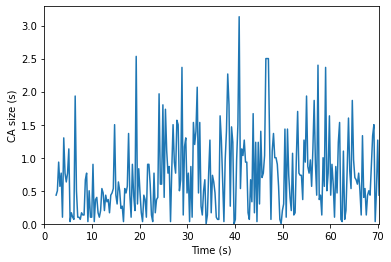

In [3]:
times = [fr / FPS for fr in FRAMES]
plt.plot(times, [size / FPS for size in ca_sizes])
plt.ylim(bottom=0)
plt.xlim(0, times[-1])
plt.xlabel('Time (s)')
plt.ylabel('CA size (s)')